***1. Assume a Markov-1 process with covariance matrix $R$ of size $8 \times 8$ and $\rho=0.91$. Compute the Energy Packing Efficiency and De-correlation Efficiency of the Walsh-Haddamard Transform and Discrete Cosine Transform for the above process. What is your observation about the eigenvectors of $\mathrm{R}$ in relation to the DCT basis?***

# Markov-1 Process

A 3x3 covariance matrix of a markov-1-process is of the form  

$R_{3x3}$ = \begin{matrix}
            \left( \begin{array}{cc}
          1&\rho &\rho^2\\
          \rho&1&\rho\\
          \rho^2&\rho&1\\
          \end{array}\right)
         \end{matrix} 
         
 so in general for any nxn matrix the covariance matrix can be of form $r_{i_j}=\rho^{|i-j|}$ where $r_{i_j}$ is the ijth element of $R_{nxn}$ matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def markov_one_process(rho,n):
    x=np.arange(n) 
    y=np.arange(n)
    X,Y=np.meshgrid(x,y)
    return rho**(np.abs(X-Y))

# Walsh Haddamard Matrix 
Walsh Haddariaed Transform:

The Haddamard transform matrices $\mathrm{Hn}$ ale NXN matrices

wheu $N=2^{n}, n=1,2,3, \ldots$

These can be geneeated from a core matrix

$$
H_{1}=\frac{1}{\sqrt{2}}\left[\begin{array}{rr}
1 & 1 \\
1 & -1
\end{array}\right]
$$

and $H_{n}=H_{n-1} \otimes H_{1}=H_{1} \otimes H_{n-1}$

In [2]:
def walsh_haddamard_matrix(n):
    H1 = np.array(([1, 1], [1, -1]))/np.sqrt(2)
    H = H1.copy()
    if n == 1:
        return H1
    else:
        for i in range(1, n):
            H = np.kron(H, H1) #Hnxn=Hn-1xn-1 kronecker with H1
        return H

# DCT Matrix
$$
\begin{aligned}
& \begin{array}{ll}\text { 1D-DCT is as follows: }  \\V(K)=\alpha(k) \sum_{n=0}^{N-1} u(n) \cos \left[\frac{\pi(2 n+1) K}{2 N}\right] ; 0 \leq k \leq N-1\end{array} \\
& \text { where } \alpha(0)=\frac{1}{\sqrt{N}}, \alpha(K)=\sqrt{\frac{2}{N}}, 1 \leq K \leq N-1 \\
& \text { 1D-DCT : } u(n)=\sum_{k=0}^{N-1} \alpha(K) v(K) \cos \left[\frac{\pi(2 n+1) K}{2 N}\right] ; \quad 0 \leqslant n \leqslant N-1 \\
& V(K)=\alpha(k) \sum_{n=0}^{N-1} u(n) \cos \left(\frac{\pi(2 n+1) K}{2 N}\right) \\
& \text { can be written as } v=C \text { u }
\end{aligned}
$$

where

$$
C(k, n)=\left[\begin{array}{Cl}
\frac{1}{\sqrt{N}} ; k=0, & 0 \leq n \leq N-1 \\
\sqrt{\frac{2}{N}} \cos \left[\frac{\pi(2 n+1) k}{2 N}\right] ; & 1 \leq K \leq N-1 \\
0 \leq n \leq N-1
\end{array}\right.
$$

In [3]:
def DCT_matrix(N):
    n, k = np.meshgrid(np.arange(N), np.arange(N))
    C = (np.sqrt(2/N))*(np.cos(np.pi*(2*n+1)*k/(2*N)))
    C[k == 0] = np.sqrt(1/N)
    return C

# Energy Packing efficiency (EPE)
The EPE  is given by 

EPE(M)=$\frac{\sum_{i=1}^{M}r'(i,i)}{\sum_{j=1}^{N}r'(j,j)}$
 
where M is the first M coefficients and N is the total coefficients

In [4]:
def EPE(R):
    diag_vals = np.abs(np.diag(R))
    total_energy = np.sum(diag_vals)
    energy_packed = np.cumsum(diag_vals) #cumulative sum of diagonal values
    return energy_packed/total_energy

# Decorrelation Efficiency 
The decorrelation efficiency $\eta$ is given by
$\eta=1-\frac{\alpha}{\beta}$
where $\alpha=\sum_{i,j=1,i\not=j}^{N}|r'(i,i)|$ and $\beta=\sum_{i,j=1,i\not=j}^{N}|r(i,i)|$

In [29]:
def decorrelation_efficiency(R, R_prime):
    n = np.shape(R)[0]
    non_diagonal_vals = 1-np.eye(n)
    r = np.abs(non_diagonal_vals*R)
    r_prime = np.abs(non_diagonal_vals*R_prime)
    alpha = np.sum(r_prime)
    beta = np.sum(r)
    eta = 1-(alpha/beta)
    return eta

# 2D DCT using 1D DCT

The 2D-DCT using 1D-DCT for a given image $U_{mxn}$ can be calculated as $V=A_{mxm}UB_{nxn}^T$ where A and B are the 1D unitary DCT matrix

In [30]:
def DCT_2D(image):
    m, n = np.shape(image)
    A = DCT_matrix(m)
    B = DCT_matrix(n)
    return A@image@(B.T)

# 2D WHT using 1D WHT
The 2D-WHT using 1D-WHt for a given image $U_{mxn}$ can be calculated as  $V=H_{mxm}UH_{nxn}^T$ where H's are the 1D-unitary WHT matrices of size in powers of 2

In [31]:
def WHT_2D(image):
    x, y = np.shape(image)
    n_x = int(np.ceil(np.log2(x)))
    n_y = int(np.ceil(np.log2(y)))
    diff_x = 2**n_x - x
    diff_y = 2**n_y - y
    assert diff_x == 0 and diff_y ==0, "Image dimensions should be a power of 2"
    H_x = walsh_haddamard_matrix(n_x)
    H_y = walsh_haddamard_matrix(n_y)
    transform_coeffs = H_x@image@(H_y.T)
    return transform_coeffs

In [32]:
# constructing the R matrix
n=8
rho=0.91
R = markov_one_process(rho, n)
# Get the 2D DCT and WHT of R
R_DCT = DCT_2D(R)
R_WHT = WHT_2D(R)
# computing the energy packing and decorrelation efficiencies
epe_R_DCT = EPE(R_DCT)
epe_R_WHT = EPE(R_WHT)
eta_R_DCT = decorrelation_efficiency(R, R_DCT)
eta_R_WHT = decorrelation_efficiency(R, R_WHT)

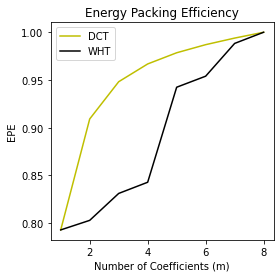

In [33]:
plt.figure(figsize=(4, 4))
plt.plot(np.arange(n)+1, epe_R_DCT, 'y')
plt.plot(np.arange(n)+1, epe_R_WHT, 'black')
plt.xlabel("Number of Coefficients (m)")
plt.ylabel("EPE")
plt.title("Energy Packing Efficiency")
plt.legend(["DCT", "WHT"])
plt.show()

In [34]:
print("eta_R_DCT",eta_R_DCT)
print("eta_R_WHT",eta_R_WHT)

eta_R_DCT 0.9804711989227338
eta_R_WHT 0.9485667904674058


**Observation:** 
DCT performed well over WHT both in terms of EPE and decorrelation efficiency.



In [104]:
print(np.round(R_DCT,decimals=2))

[[ 6.34  0.   -0.29  0.   -0.07 -0.   -0.02  0.  ]
 [ 0.    0.93  0.   -0.03  0.   -0.01  0.   -0.  ]
 [-0.29  0.    0.31  0.   -0.    0.   -0.   -0.  ]
 [ 0.   -0.03  0.    0.15  0.   -0.    0.   -0.  ]
 [-0.07 -0.   -0.    0.    0.09  0.   -0.   -0.  ]
 [-0.   -0.01  0.   -0.    0.    0.07  0.   -0.  ]
 [-0.02  0.   -0.    0.   -0.    0.    0.06 -0.  ]
 [ 0.   -0.   -0.   -0.   -0.   -0.   -0.    0.05]]


Eigen vectors of R exactly same as the DCT basis vectors if on diagonalizing R we get a purely diagonal matrix, here we got diagonal matrix with few off diagonal elements.

***2. Find $\beta^{2} R^{-1}$, where $\beta^{2}=\frac{1-\rho^{2}}{1+\rho^{2}}$. Does $\beta^{2} R^{-1}$ have a tridiagonal structure?. Is it close to the tridiagonal matrix $Q$ given by,***

$$
\mathbf{Q}=\left[\begin{array}{cccccccc}
1-\alpha & -\alpha & 0 & 0 & 0 & 0 & 0 & 0 \\
-\alpha & 1 & -\alpha & 0 & 0 & 0 & 0 & 0 \\
0 & -\alpha & 1 & -\alpha & 0 & 0 & 0 & 0 \\
0 & 0 & -\alpha & 1 & -\alpha & 0 & 0 & 0 \\
0 & 0 & 0 & -\alpha & 1 & -\alpha & 0 & 0 \\
0 & 0 & 0 & 0 & -\alpha & 1 & -\alpha & 0 \\
0 & 0 & 0 & 0 & 0 & -\alpha & 1 & -\alpha \\
0 & 0 & 0 & 0 & 0 & 0 & -\alpha & 1-\alpha
\end{array}\right]
$$

where $\alpha=\frac{\rho}{1+\rho^{2}}$

Try diagonalizing $\beta^{2} R^{-1}$ and $\mathrm{Q}$ using the DCT matrix. What is your observation.?

# Computing $\alpha,\beta$ values

In [35]:
a=1-rho*rho
b=1+rho*rho
beta=a/b
beta_square=beta*beta
alpha=rho/b
print("alpha=",alpha)
print("beta=",beta)
print("beta_square=",beta_square)

alpha= 0.4977845850883431
beta= 0.09403205513921555
beta_square= 0.008842027393704472


# Finding $R^{-1}$

In [36]:
import numpy as np 
R_inverse=np.linalg.inv(R)

In [37]:
print(R_inverse)

[[ 5.81733566e+00 -5.29377545e+00  1.77216654e-15 -1.65634868e-15
   1.44929322e-15 -1.87984572e-15  1.03179305e-15 -3.90692601e-16]
 [-5.29377545e+00  1.06346713e+01 -5.29377545e+00  4.38902100e-15
  -2.52429349e-15  2.07731293e-15 -2.84062669e-15  1.73704293e-15]
 [ 1.71363408e-15 -5.29377545e+00  1.06346713e+01 -5.29377545e+00
  -1.10998662e-15  4.12621430e-16  1.31212059e-15 -2.16979892e-15]
 [-1.82313927e-15  6.71007946e-15 -5.29377545e+00  1.06346713e+01
  -5.29377545e+00 -8.08858129e-16 -3.59720013e-15  4.14103249e-15]
 [ 1.28581458e-15 -4.05873577e-15  1.96335870e-15 -5.29377545e+00
   1.06346713e+01 -5.29377545e+00  7.67219905e-15 -7.14272443e-15]
 [-2.52835953e-15  3.65147573e-15  2.04694383e-16 -3.27281929e-15
  -5.29377545e+00  1.06346713e+01 -5.29377545e+00  6.69786888e-15]
 [ 2.38414808e-15 -4.34537804e-15  8.94916614e-16  4.32441233e-16
   4.98551171e-15 -5.29377545e+00  1.06346713e+01 -5.29377545e+00]
 [-4.34401400e-16  2.03650683e-15 -1.58641118e-15  1.33594900e-15
  -

In [38]:
A=beta_square*R_inverse
print(A)

[[ 5.14370413e-02 -4.68077076e-02  1.56695451e-17 -1.46454804e-17
   1.28146903e-17 -1.66216473e-17  9.12314246e-18 -3.45451468e-18]
 [-4.68077076e-02  9.40320551e-02 -4.68077076e-02  3.88078439e-17
  -2.23198722e-17  1.83676578e-17 -2.51168990e-17  1.53589812e-17]
 [ 1.51519995e-17 -4.68077076e-02  9.40320551e-02 -4.68077076e-02
  -9.81453209e-18  3.64840998e-18  1.16018062e-17 -1.91854215e-17]
 [-1.61202474e-17  5.93307064e-17 -4.68077076e-02  9.40320551e-02
  -4.68077076e-02 -7.15194573e-18 -3.18065421e-17  3.66151227e-17]
 [ 1.13692077e-17 -3.58874528e-17  1.73600714e-17 -4.68077076e-02
   9.40320551e-02 -4.68077076e-02  6.78377942e-17 -6.31561651e-17]
 [-2.23558242e-17  3.22864485e-17  1.80991334e-18 -2.89383578e-17
  -4.68077076e-02  9.40320551e-02 -4.68077076e-02  5.92227401e-17]
 [ 2.10807026e-17 -3.84219517e-17  7.91287722e-18  3.82365723e-18
   4.40820311e-17 -4.68077076e-02  9.40320551e-02 -4.68077076e-02]
 [-3.84098908e-18  1.80068492e-17 -1.40270911e-17  1.18124976e-17
  -

# Tridiagonal Matrix $Q$

In [39]:
def tridiagonal_matrix(n,alpha):
    Q=np.zeros((n,n))
    x=np.arange(n)
    y=np.arange(n)
    X,Y=np.meshgrid(x,y)
    diff=abs(X-Y)
    Q[diff==1]=-alpha
    Q[diff==0]=1
    Q[0,0]=1-alpha
    Q[-1,-1]=1-alpha
    return Q

In [40]:
print(np.round(A,decimals=3))


[[ 0.051 -0.047  0.    -0.     0.    -0.     0.    -0.   ]
 [-0.047  0.094 -0.047  0.    -0.     0.    -0.     0.   ]
 [ 0.    -0.047  0.094 -0.047 -0.     0.     0.    -0.   ]
 [-0.     0.    -0.047  0.094 -0.047 -0.    -0.     0.   ]
 [ 0.    -0.     0.    -0.047  0.094 -0.047  0.    -0.   ]
 [-0.     0.     0.    -0.    -0.047  0.094 -0.047  0.   ]
 [ 0.    -0.     0.     0.     0.    -0.047  0.094 -0.047]
 [-0.     0.    -0.     0.    -0.     0.    -0.047  0.051]]


In [41]:
Q=tridiagonal_matrix(8,alpha)
print(np.round(Q,decimals=3))

[[ 0.502 -0.498  0.     0.     0.     0.     0.     0.   ]
 [-0.498  1.    -0.498  0.     0.     0.     0.     0.   ]
 [ 0.    -0.498  1.    -0.498  0.     0.     0.     0.   ]
 [ 0.     0.    -0.498  1.    -0.498  0.     0.     0.   ]
 [ 0.     0.     0.    -0.498  1.    -0.498  0.     0.   ]
 [ 0.     0.     0.     0.    -0.498  1.    -0.498  0.   ]
 [ 0.     0.     0.     0.     0.    -0.498  1.    -0.498]
 [ 0.     0.     0.     0.     0.     0.    -0.498  0.502]]


**Observation:** 
The matrix $\beta^{2} R^{-1}$ approximately has the tridiagonal structure as $Q$

# Diagonalizing $\beta^{2} R^{-1}$ and Q using DCT matrix

In [42]:
A_DCT=DCT_2D(A)
print(np.round(A_DCT,decimals=3))

[[ 0.001 -0.     0.001 -0.     0.001  0.     0.001  0.   ]
 [-0.     0.01  -0.     0.002  0.     0.001  0.     0.   ]
 [ 0.001 -0.     0.03   0.     0.001  0.     0.001  0.   ]
 [-0.     0.002  0.     0.06   0.     0.001  0.     0.   ]
 [ 0.001  0.     0.001  0.     0.095  0.     0.001 -0.   ]
 [ 0.     0.001  0.     0.001  0.     0.131 -0.     0.   ]
 [ 0.001  0.     0.001  0.     0.001 -0.     0.161  0.   ]
 [ 0.     0.     0.     0.    -0.     0.     0.     0.181]]


In [43]:
Q_DCT=DCT_2D(Q)
print(np.round(A_DCT,decimals=3))

[[ 0.001 -0.     0.001 -0.     0.001  0.     0.001  0.   ]
 [-0.     0.01  -0.     0.002  0.     0.001  0.     0.   ]
 [ 0.001 -0.     0.03   0.     0.001  0.     0.001  0.   ]
 [-0.     0.002  0.     0.06   0.     0.001  0.     0.   ]
 [ 0.001  0.     0.001  0.     0.095  0.     0.001 -0.   ]
 [ 0.     0.001  0.     0.001  0.     0.131 -0.     0.   ]
 [ 0.001  0.     0.001  0.     0.001 -0.     0.161  0.   ]
 [ 0.     0.     0.     0.    -0.     0.     0.     0.181]]


**Observation:**
It can be observed that DCT is diagonalizing both matrices with few off-diagonal elements being present in both matrices and the matrices are almost equal.

***3. Compute SVD for the given $8 \times 8$ image $\mathbf{g}$ (provided in imageFile.mat and also given below) using the following steps:***

(a) Perform eigen-value decomposition of $\mathbf{g}^{T} \mathbf{g}$ and $\mathbf{g g}^{T}$.

(b) Find the singular value matrix $\boldsymbol{\Sigma}$.

(c) Reconstruct the image using $\boldsymbol{\Sigma}$ and the eigen-vector matrices.

where
Image $\mathbf{g}=\left[\begin{array}{cccccccc}207 & 244 & 107 & 173 & 70 & 111 & 180 & 244 \\ 230 & 246 & 233 & 193 & 11 & 97 & 192 & 86 \\ 3 & 40 & 202 & 189 & 24 & 195 & 70 & 149 \\ 232 & 247 & 244 & 100 & 209 & 202 & 173 & 57 \\ 161 & 244 & 167 & 167 & 177 & 47 & 167 & 191 \\ 24 & 123 & 9 & 43 & 80 & 124 & 41 & 65 \\ 71 & 204 & 216 & 180 & 242 & 113 & 30 & 129 \\ 139 & 36 & 238 & 8 & 8 & 164 & 127 & 178\end{array}\right]$

In [44]:
from scipy.io import loadmat
g = loadmat('imageFile.mat')['g']
print(g)

[[207 244 107 173  70 111 180 244]
 [230 246 233 193  11  97 192  86]
 [ 32  40 202 189  24 195  70 149]
 [232 247 244 100 209 202 173  57]
 [161 244 167 167 177  47 167 191]
 [ 24 123   9  43  80 124  41  65]
 [ 71 204 216 180 242 113  30 129]
 [139  36 238   8   8 164 127 178]]


In [61]:
# Finding the eigen values and eigen vectors using np.linalg.eig() and sorting the eigen values in ascending order
def sort_eigenvectors(g):
    eigvals,eigvecs=np.linalg.eig(g)
    idx=eigvals.argsort()[::-1]
    eigvals=eigvals[idx]
    eigvecs=eigvecs[:,idx]
    return eigvals,eigvecs

# Eigen value decomposition of  $\mathbf{g}^{T} \mathbf{g}$ and $\mathbf{g g}^{T}$.

In [69]:
def SVD(g):
    g=g.astype(np.float64)
    m,n=np.shape(g)
    sigma=np.zeros((m,n))
    A=g@(g.T)
    B=(g.T)@g
    eigvals1,eigvec1=sort_eigenvectors(A)
    eigvals2,eigvec2=sort_eigenvectors(B)
    for i in range(min(m,n)):
        sigma[i,i]=(np.sqrt(eigvals1[i])+np.sqrt(eigvals2[i]))/2
        vec=eigvec2[:,i]
        if np.sum((g@vec-sigma[i,i]*eigvec1[:,i])**2)>np.sum((g@vec+sigma[i,i]*eigvec1[:,i])**2):
            eigvec2[:,i]=-vec
    return eigvec1,sigma,eigvec2

***4. Remove one singular value at a time from $\boldsymbol{\Sigma}$ and reconstruct the image $\left(\widehat{\mathbf{g}_{k}}\right)$. Compute $\left\|\mathbf{g}-\widehat{\mathbf{g}_{k}}\right\|^{2}$ and compare it with the sum of the squares of the first $k$ singular values.*** 

In [84]:
def reconstruction_error(g,A,sigma,B):
    g=g.astype(np.float64)
    m,n=np.shape(g)
    reconstruction_errors=np.zeros((min(m,n)))
    reconstructed_g=g.copy()
    for i in range(min(m,n)):
        reconstructed_g-=sigma[i,i]*np.outer(A[:,i],B[:,i])
        reconstruction_errors[i]=np.sum((reconstructed_g-g)**2)
    return reconstruction_errors

In [85]:
#theoritical reconstruction error 
def reconstruction_error_theoritical(Sigma):
    sigma=Sigma[Sigma>0]
    return np.cumsum(sigma**2)

Reconstructing the image $\left(\widehat{\mathbf{g}_{k}}\right)$.

In [86]:
#Reconstructing g 
A,sigma,B=SVD(g)
g_new=A@sigma@(B.T)
g_error=reconstruction_error(g_new,A,sigma,B)
print(g_error)

[1367373.91062752 1450142.04998311 1516447.96677421 1562365.7738038
 1588991.90847999 1606609.006503   1608658.00492797 1609692.        ]


In [90]:
g_error_theoritical = reconstruction_error_theoritical(sigma)
print(g_error_theoritical)

[1367373.91062752 1450142.04998311 1516447.96677421 1562365.7738038
 1588991.90847999 1606609.006503   1608658.00492797 1609692.        ]


In [91]:
print(g_new)

[[207. 244. 107. 173.  70. 111. 180. 244.]
 [230. 246. 233. 193.  11.  97. 192.  86.]
 [ 32.  40. 202. 189.  24. 195.  70. 149.]
 [232. 247. 244. 100. 209. 202. 173.  57.]
 [161. 244. 167. 167. 177.  47. 167. 191.]
 [ 24. 123.   9.  43.  80. 124.  41.  65.]
 [ 71. 204. 216. 180. 242. 113.  30. 129.]
 [139.  36. 238.   8.   8. 164. 127. 178.]]


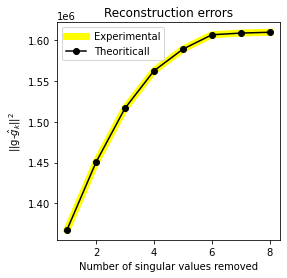

In [102]:
plt.figure(figsize=(4, 4))
n=8
plt.plot(np.arange(n)+1, g_error_theoritical, 'yellow',linewidth=7)
plt.plot(np.arange(n)+1, g_error, "-o",color='black')
plt.xlabel("Number of singular values removed")
plt.ylabel(r"||g-$\hat{g}_{k}||^{2}$")
plt.legend(['Experimental','Theoriticall'])
plt.title("Reconstruction errors")
plt.show()

From the above plot we can clearly see that computing SVD for a given image g and reconstructing it using all singular values gives exact same information and the theoritical and calculated values for reconstruction errors on removing some k singular values is some squares of those k singular values